**Avi Skidelsky, Mark Kaplan**

**Qianwen Liu, Nosson Weissman**

**DAV 6150 - Data Science**

**Professor James Topor**

**Summer 2022**

__DAV 6150 Project 2__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
import statsmodels.api as sm
import math as m
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from scipy.stats import boxcox
from scipy import stats
from scipy.special import boxcox1p
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%matplotlib inline

In [ ]:
df =pd.read_csv("https://raw.githubusercontent.com/mark-kaplan-321/DAV-data/main/Project2_Data.csv")
labels = pd.read_csv("https://raw.githubusercontent.com/mark-kaplan-321/DAV-data/main/Project2_Data_Labels.csv")
df_1 = df.copy()

## **1) Introduction:** 

In this project we are given a customer data from a ecommerce website.
Each record includes:
- How close to a holiday or (special day) an observation is, with respect to time
- Number of pages visted by a user by page category (ex. informational, admin, product)
- How likely a customer is to leave upon landing on a page
- A considerable amount of categorical data.
- A number of of other variables

The goal is to build a clustering model which can predict whether a particular user session will result in a sale.

We will be woring with the k-means clustering algorithm.

Using the standard kmeans algorithm, we cannot include categorical data in our clustering training data. Therefore, for the Kmeans clustering part of this assignmnet, we have excluded the categorical data.

Additionally, for the SVM algorithms, some of the categorical data is given without an explaination and with a large number of categories. As such we decided to exclude these variables from the SVM algorithms.
 

Data Description:

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related", and "Product Related Duration" are the number of different types of pages visited by the visitor in that session and total time spent in each of these categories.

"Bounce Rate", "Exit Rate", and "Page Value" represent metrics for each page in the e-commerce site. The bounce rate is the percentage of users who enter the site from that page and leave without triggering other requests. Exit rate is calculated as for all pageviews to the page, the percentage that were the last in the session. Page value represents the average value of a page that a user visited before completing an e-commerce transaction. Special day feature indicates the closeness of the site visiting time to a specific day in which the sessions are more likely to be finalized with the transaction. 


1. Administrative: the number of administrative pages visited by the visitor in that session
2. Administrative_Duration: total time spent on the administrative page
3. Informational: the number of informational pages visited by the visitor in that session
4. Informational_Duration: total time spent on an informational page
5. ProductRelated: the number of product-related pages visited by the visitor in that session
6. ProductRelated_Duration: total time spent on product-related page
7. BounceRates: the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
8. ExitRates: the value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
9. PageValues: the "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
10. SpecialDay: the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction.
11. Month: month of the year.
12. OperatingSystems: different operating systems of the machine used by the user to access the website
13. Browser: different browsers used by the user to access the website
14. Region: the region of the user visiting the site
15. TrafficType: The overarching term we use to describe Users/Visitors and their activity on your site
16. VisitorType: returning/new visitor
17. Weekend: a Boolean value indicating whether the date of the visit is weekend.


2) Pre-Clustering Exploratory Data Analysis (10 Points)

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False


In [ ]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
dtype: object

Looking at the types of this data set, all are numeric with the exception of Weekend, Month, and VisitorType which are boolean, string, and string respectively. Even though the rest are all numeric, all variables on the above list after SpecialDay are categorical and not numeric even though some are coded as such.

Because of this, we will have to convert those that we decide to use into objects and then from there into dummy variables for processing.

In [ ]:
  df.isna().sum().sum()

0

As always, it's crucial to check for missing values in every data set so that we can address them before delving into any EDA work. Thankfully there are none so we can move forward.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faaf89eb6d0>,
      dtype=object)

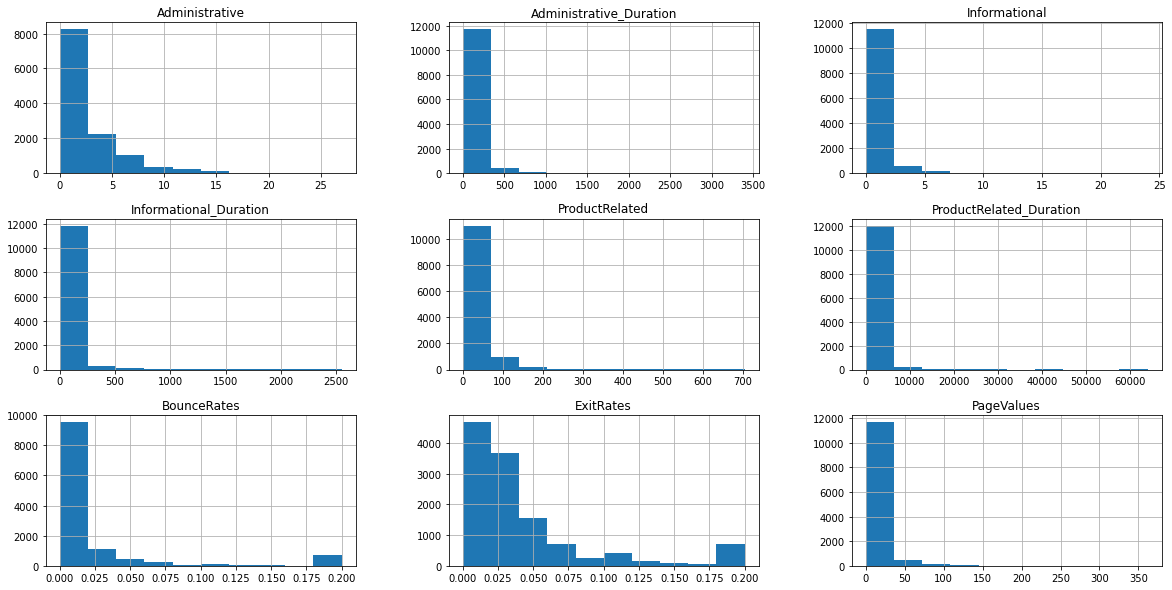

In [ ]:
df.iloc[:,:9].hist(figsize=(20,10))

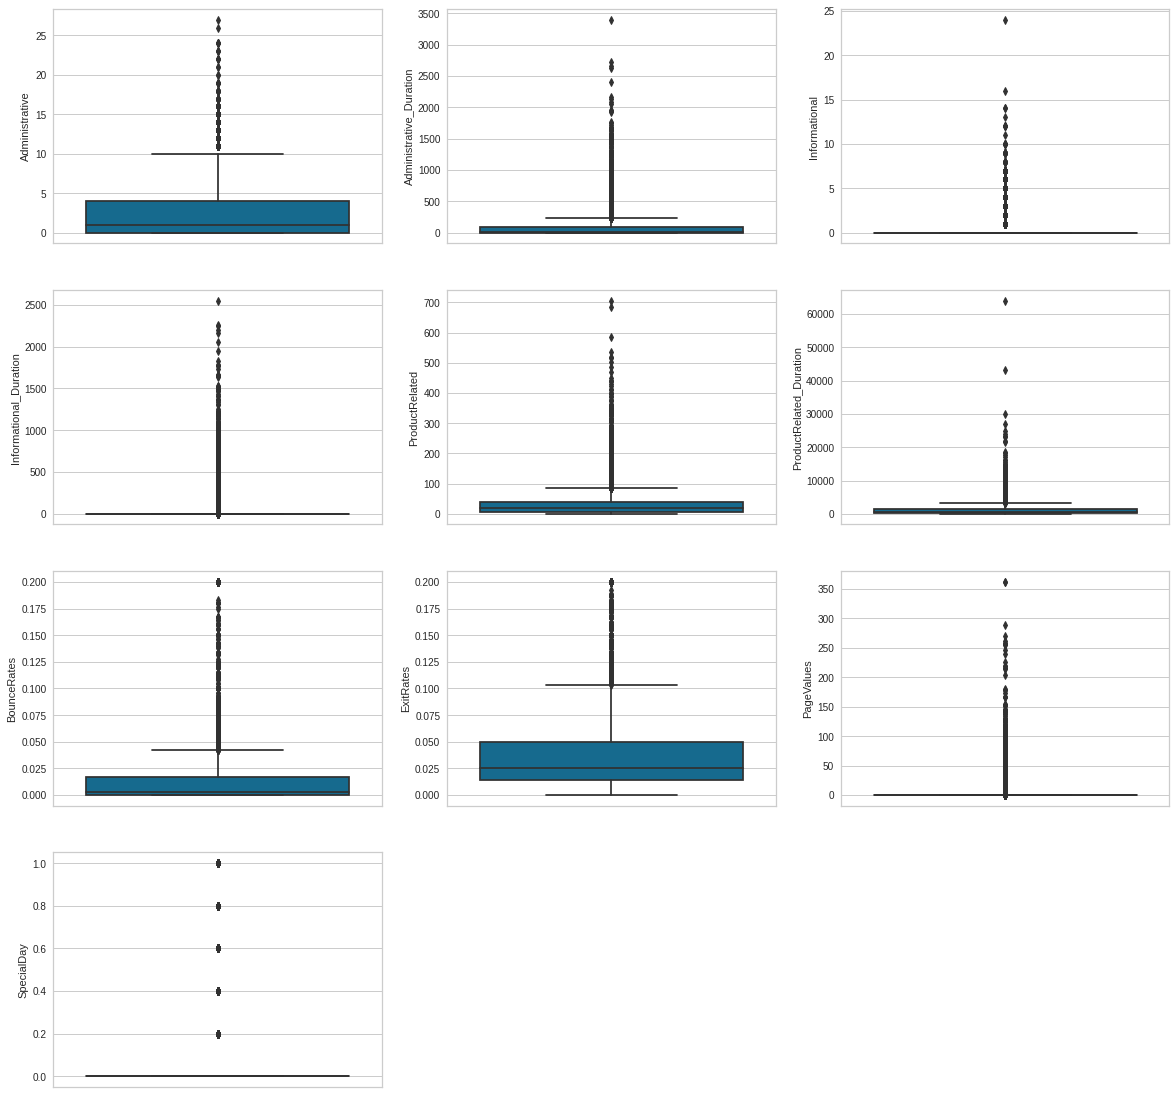

In [ ]:
numeric = ['Administrative', 'Administrative_Duration',
           'Informational', 'Informational_Duration',
           'ProductRelated', 'ProductRelated_Duration',
           'BounceRates', 'ExitRates', 'PageValues','SpecialDay']


plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j = 1

# Columns
for k in numeric:   #for each numeric column in the dataframe
    plt.subplot(5,3,j)
    sns.boxplot(y = k,data = df)
    j = j + 1 #add 1 to go to the next subplot space

#show results
plt.show();

Data needs to be standardized and scaled before going into a lot of clustering algorithms so the data will have to be put through a standard scaler. All of the variables are extremely right skewed and as such need to be put through a distribution transformation. Even ExitRates, which has a more variable distribution is skewed but less so.

Before going into a clustering algorithm, it needs to be treated for outliers. According to the above distribution charts, there don't seem to be very many outliers for the numeric values so we shouldn't be too worried about those impacting our analysis, especially after transformation.

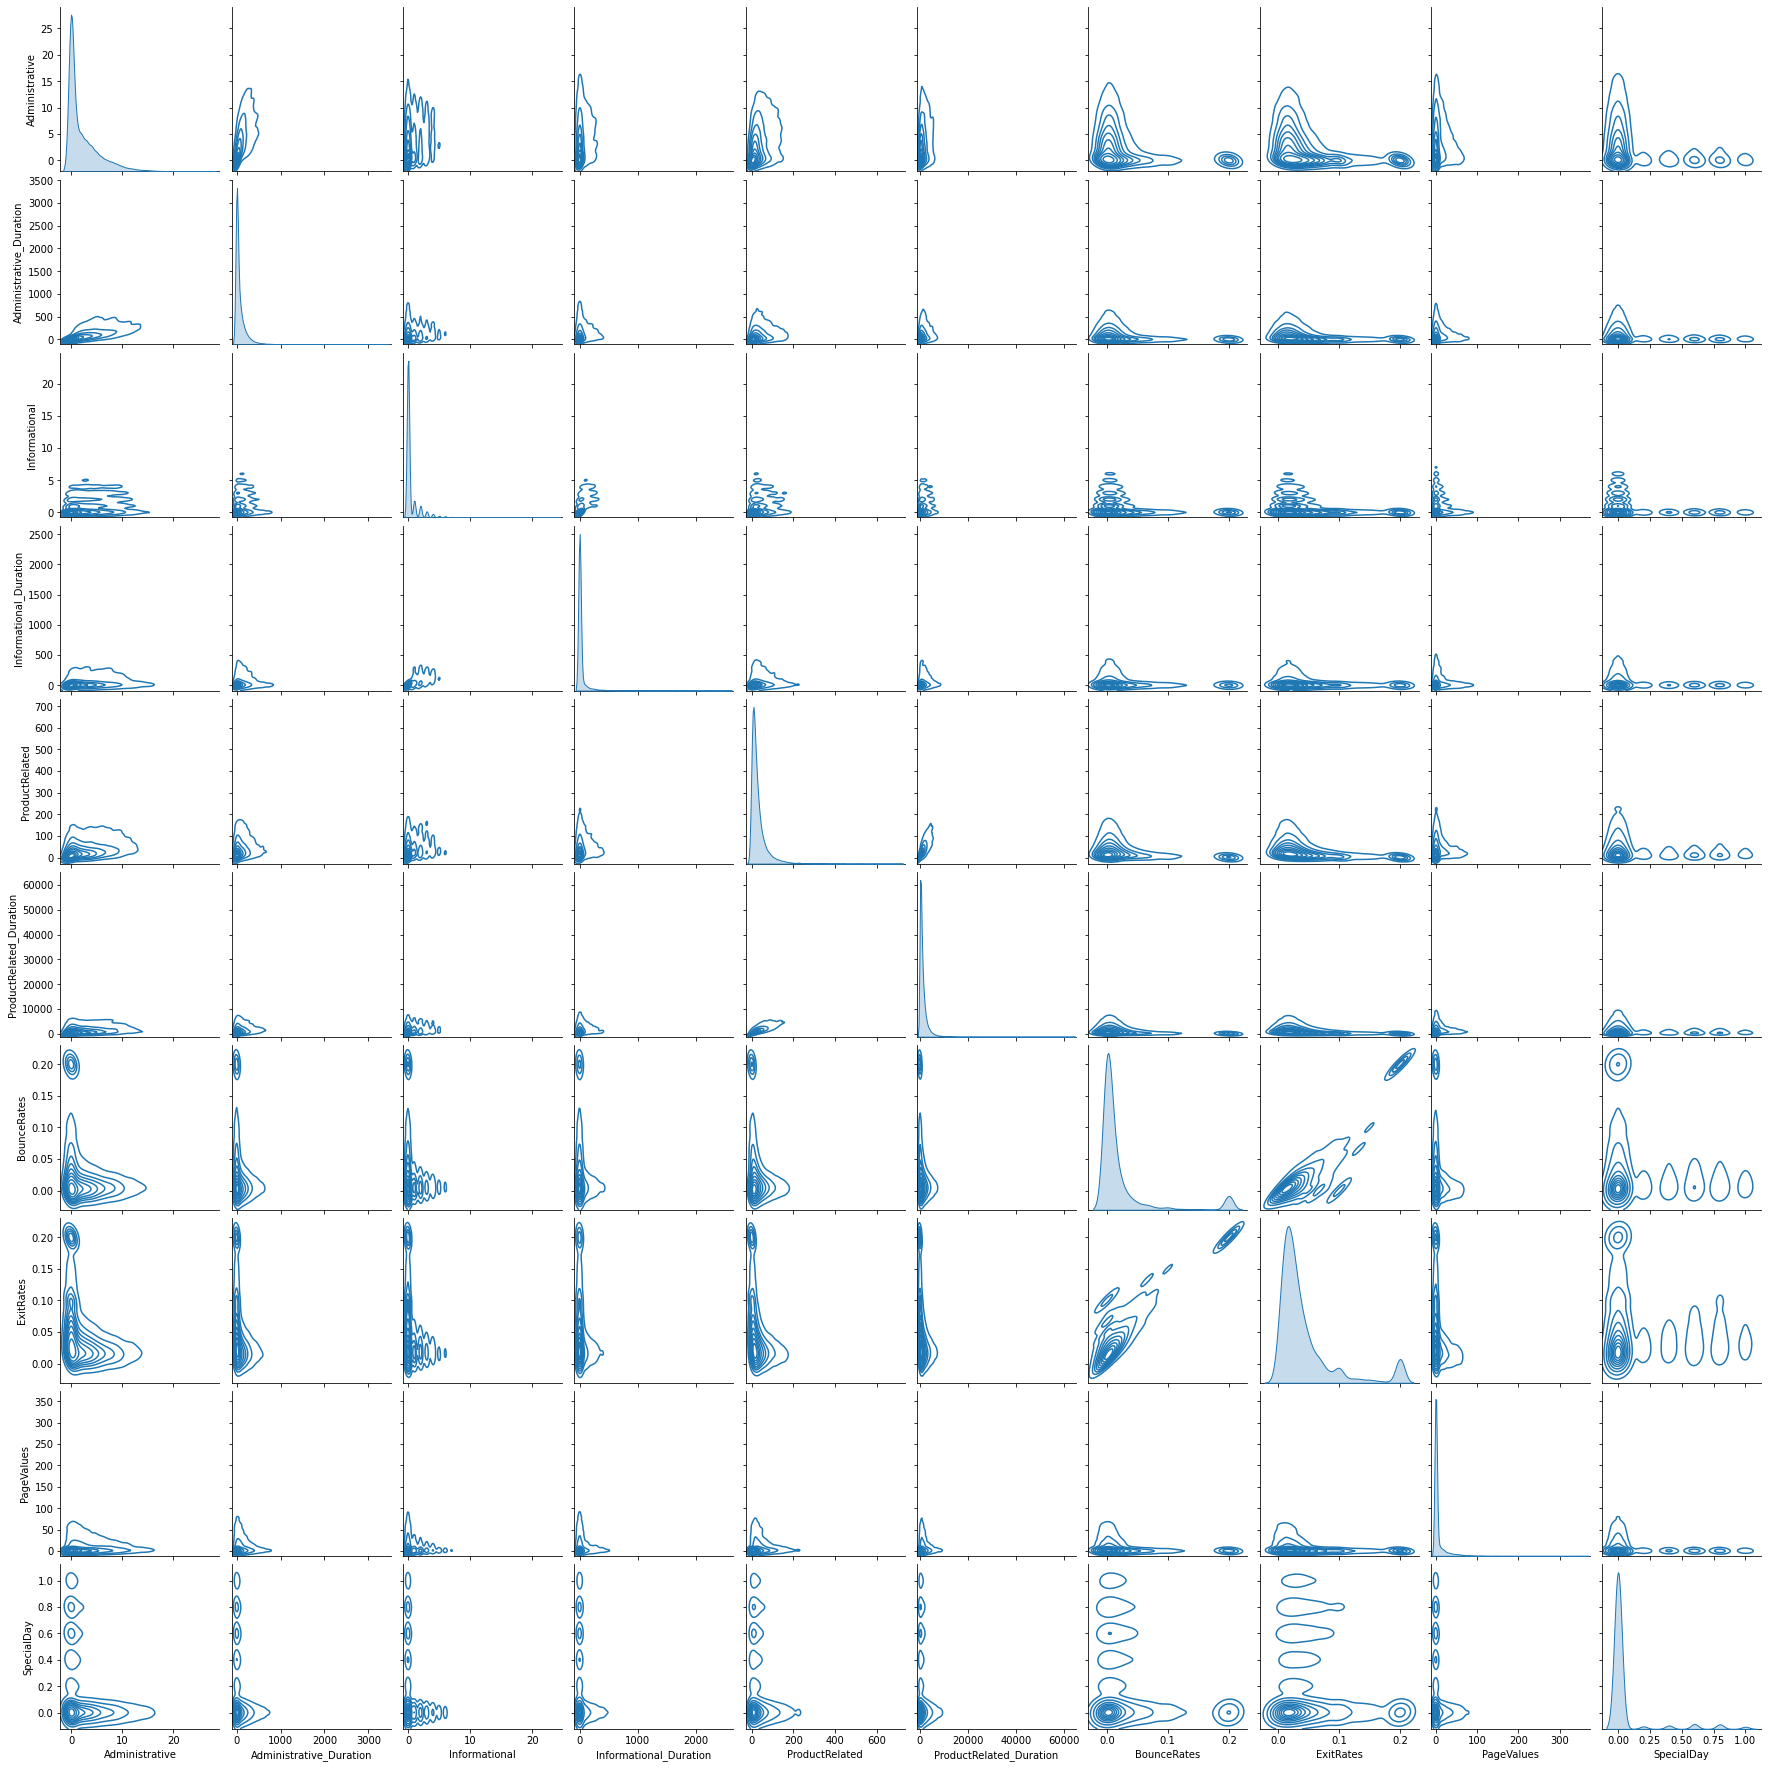

In [ ]:
nums = df.iloc[:,:10]
sns.pairplot(nums, kind="kde")

Taking a look at these pairplots, we can clearly see which variables will likely help in our clustering algorithms. One of the most apparent is SpecialDay, it very clearly creates clusters with each other variable that it interacts with. 

There are a few other variables that may be considered useful based on the clusters and trends that they form when paired with other variables. Two of the most notable when it comes to forming clusters are ExitRate and BounceRate when they interact. They show a very strong positive correlation and form into nice neat clusters.

Moving on the categorical data, we don't have a response variable since this is unsupervised so we will only be able to look at the distribution of the data which in the case of categorical variables, is the count of their occurrence. A common theme with these values is that there are a lot of categories for many of the variables. Since converting all of these to dummies will be way too much information to handle, we will be grouping some values together prior to making dummy variables.

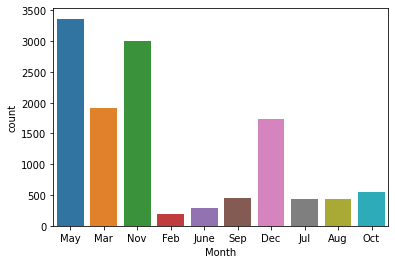

In [ ]:
sns.countplot(x='Month', data=df)

It seems that for the months where there are observations (there are none for January and April), it doesn't seem like any of these have a worryingly small number of observations and that all are represented. In the case of Month, the only transformation that we will be doing is converting these to dummy variables.

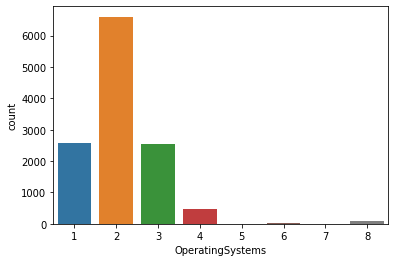

In [ ]:
sns.countplot(x='OperatingSystems', data=df)

When it comes to OperatingSystems, there are a worryingly small amount of observations for numbers 4, 5, 6, 7, and 8. For this reason we will be making a transformation to this variable which will be grouping them into four categories, 1, 2, 3, and other. After this we will need to convert them to dummies but at least there will only be three instead of seven which will make this much easier to analyze.

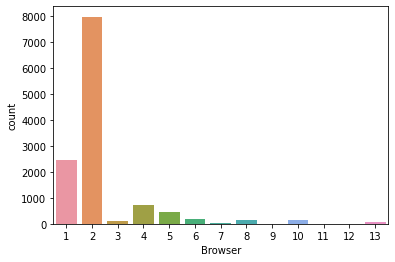

In [ ]:
sns.countplot(x='Browser', data=df)

Similar to OperatingSystems, there are a worryingly small amount of observations outside of 1 and 2. We will be taking a similar strategy to OperatingSystems by combining different categories so that we are left with 1, 2, and other which breaks down into only two dummies.

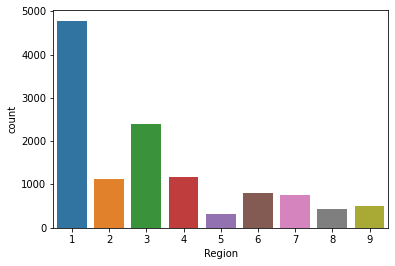

In [ ]:
sns.countplot(x='Region',data=df)

Similar to the above, we will be combining values with each other. In this case we will use the threshold of 1,000. Meaning that values with less than 1,000 occurrences will be grouped together to make up for the disproportionate amount of observations of 1 and 3.

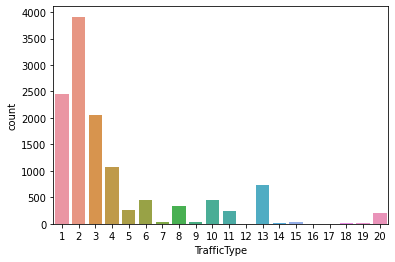

In [ ]:
sns.countplot(x='TrafficType', data=df)

TrafficType has a higher amount of categories than any other variable so it will be crucial to combine variables to decrease the volume that converting to dummies would create. We will be breaking it down into four categories, 1, 2, 3, and other since after 3 there is a big drop off in count of values.

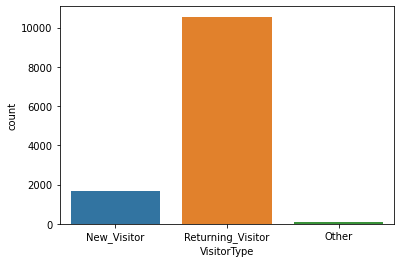

In [ ]:
sns.countplot(x='VisitorType', data=df)

From a domain knowledge perspective, the fact that the category of Other exists is troubling. Since a customer is either new or returning, any observation that is listed as "Other" is obviously misclassified. However, we will not remove the observations listed as other since they may be important and because we don't have a response variable, it's hard to say for sure if this is the case.

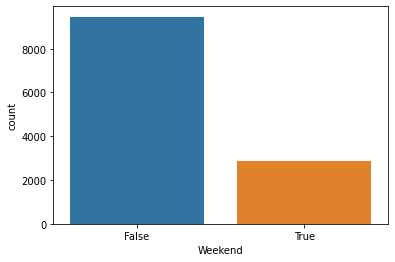

In [ ]:
sns.countplot(x='Weekend', data=df)

Weekend is only two categories, therefore will only need to be transformed into a 1 or 0, the typical treatment of binary/boolean variables.

# 3) Pre-Clustering Data Preparation (5 Points):

As stated above, the numeric columns will need to be standardized so the data set as a whole will be run through a standard scaler. The transformation techniques that we apply is a yeo-johnosn method due to the presence of 0 values in our dataset

In [ ]:
from sklearn.preprocessing import power_transform as pt
df_prep = df.copy()
columns = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated',
           'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

for column in columns:
    a = df_prep[[column]]
    df_prep[column] = pt(a,method='yeo-johnson')

df_prep[columns].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,-0.990128,-0.996659,-0.520489,-0.491697,-0.619245,-0.532374,-0.799209,-0.029540,1.982295
1,-0.990128,-0.996659,-0.520489,-0.491697,-0.168286,0.397858,0.423405,0.655157,-0.529409
2,1.040186,0.662790,1.964686,2.069941,-1.132804,-0.912032,-0.799209,-0.581230,-0.529409
3,1.040186,1.053114,-0.520489,-0.491697,-0.057127,0.085413,-0.799209,-0.907817,-0.529409
4,0.091737,0.830316,1.823038,1.969567,0.356015,0.099835,-0.799209,-1.478985,-0.529409


Also noted above above, some large transformations will need to take place with the categorical variables when it comes to combining values and then creating dummy variables to replace them. We will create the dummy variables for all categorical values at the same time and the combinations will occur in the steps before that.

In [ ]:
df_prep['OperatingSystems'] = np.where(df_prep['OperatingSystems']==1,'One',np.where(df_prep['OperatingSystems']==2,'Two',np.where(df_prep['OperatingSystems']==3,'Three','Other')))
df_prep['Browser'] = np.where(df_prep.Browser==1,'One',np.where(df_prep.Browser==2,'Two','Other'))
df_prep['Region'] = np.where(df_prep.Region==1, 'One',np.where(df_prep.Region==2,'Two',np.where(df_prep.Region==3,'Three',np.where(df_prep.Region==4,'Four','Other'))))
df_prep['TrafficType'] = np.where(df_prep.TrafficType==1,'One',np.where(df_prep.TrafficType==2,'Two',np.where(df_prep.TrafficType==3,'Three','Other')))

In [ ]:
data_converted = pd.get_dummies(df_prep, columns=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend'], drop_first=True)

In [ ]:
data_converted.dtypes

Administrative                   float64
Administrative_Duration          float64
Informational                    float64
Informational_Duration           float64
ProductRelated                   float64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
Month_Dec                          uint8
Month_Feb                          uint8
Month_Jul                          uint8
Month_June                         uint8
Month_Mar                          uint8
Month_May                          uint8
Month_Nov                          uint8
Month_Oct                          uint8
Month_Sep                          uint8
OperatingSystems_Other             uint8
OperatingSystems_Three             uint8
OperatingSystems_Two               uint8
Browser_Other                      uint8
Browser_Two                        uint8
Region_One      

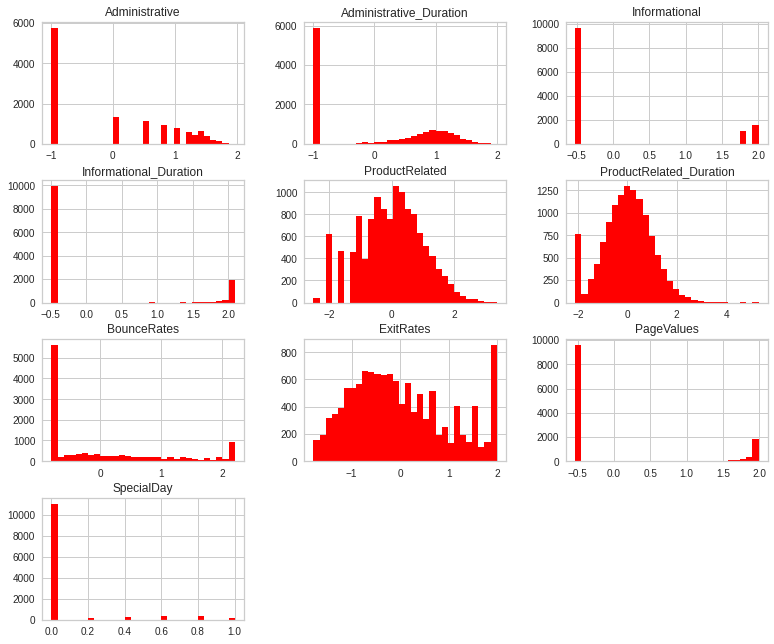

In [ ]:
numeric = ['Administrative', 'Administrative_Duration',
           'Informational', 'Informational_Duration',
           'ProductRelated', 'ProductRelated_Duration',
           'BounceRates', 'ExitRates', 'PageValues','SpecialDay']
data_converted[numeric].hist(figsize=(13, 11), color='red', bins = 30);
plt.show();

Preforming a post transformation EDA, we see that the values are significantlly more Gaussian. We now add dummies for all of the categorical values.

## 4) Cluster Modeling

In this section we create a hierarchical clustering algorithm dendogram to help  identify the optimal number of clusters. We then implement a K-means algorithm, and use an elbow plot and a silhouette plot to determine the optimal number of clusters.



In [ ]:
df_numerical = data_converted[['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration','ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues','SpecialDay']]

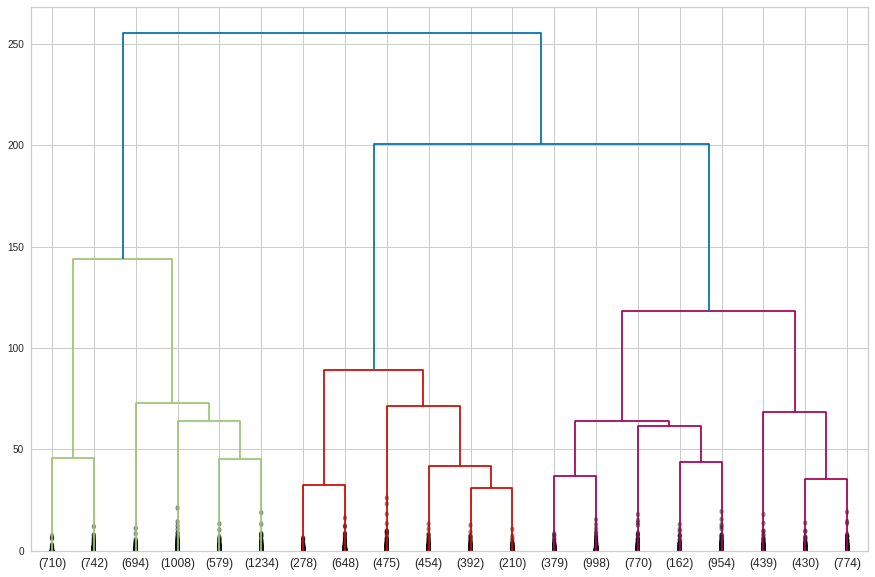

In [ ]:
from scipy.cluster import hierarchy
fig, ax = plt.subplots(figsize=(15, 10))
dend = hierarchy.dendrogram(
    hierarchy.linkage(df_numerical, method="ward"),
    truncate_mode="lastp",
    p=20,
    show_contracted=True,
)

The optimal number of clusters would seem to be either 2 or 3.

Text(0, 0.5, 'Inertia')

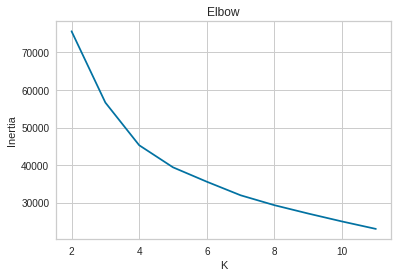

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy

inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(df_numerical)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
plt.title("Elbow")
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

From the elbow chart we ascertain the inflection point and see that 4 would be a good value.

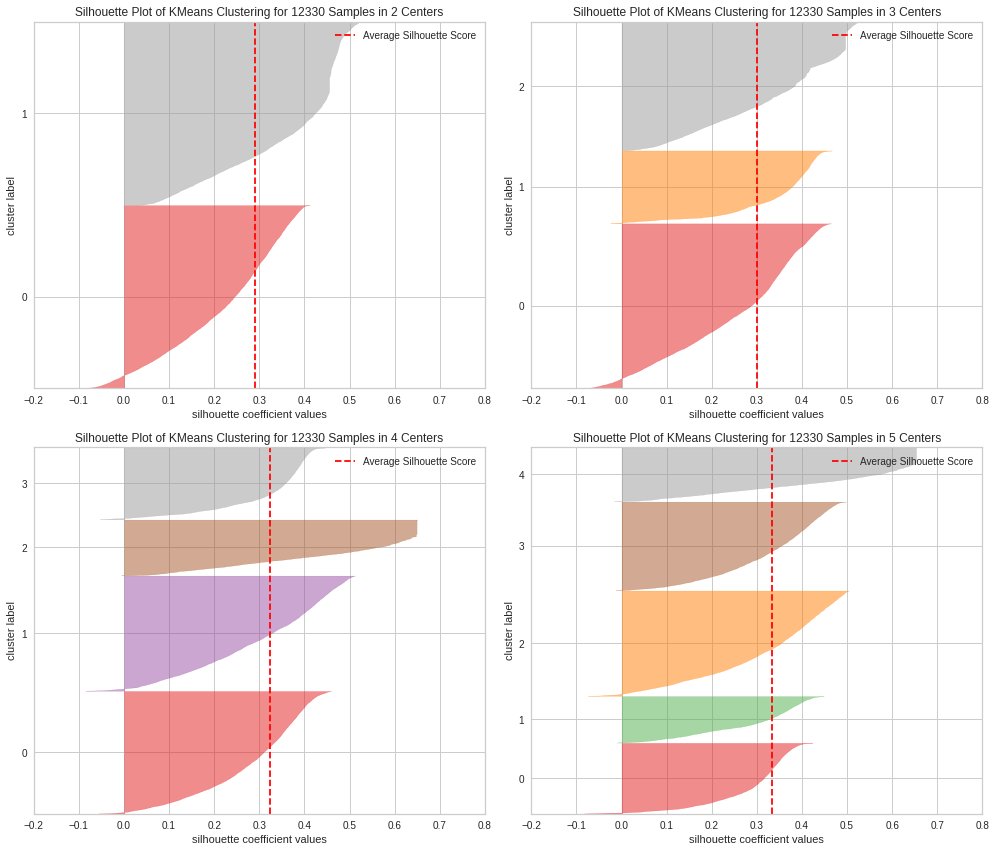

In [ ]:
from yellowbrick.cluster.silhouette import (
    SilhouetteVisualizer,
)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.reshape(4)
for i, k in enumerate(range(2, 6)):
    ax = axes[i]
    sil = SilhouetteVisualizer(
        KMeans(n_clusters = k, random_state = 42 ),
        ax=ax,
    )
    sil.fit(df_numerical)
    sil.finalize()
    ax.set_xlim(-0.2, 0.8)
plt.tight_layout()

We would expect either 2 or 3 clusters which are similarly shaped and similarly sized. 2 and 5 also have high silhouette coefficient values. 

We now run the KMeans analysis with k=2

In [ ]:
km = KMeans(init="k-means++",
            n_clusters=2,
            max_iter=300,
            random_state=42)

# fit the model
km.fit(df_numerical)
print(f'Converged after {km.n_iter_} iterations')


Converged after 9 iterations


In [ ]:
#applying k-means to data
clusters = km.predict(df_numerical)
#adding to data
data_converted['Revenue'] = pd.Series(clusters, index=data_converted.index)
data_converted.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region_Other,Region_Three,Region_Two,TrafficType_Other,TrafficType_Three,TrafficType_Two,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue
0,-0.990128,-0.996659,-0.520489,-0.491697,-0.619245,-0.532374,-0.799209,-0.029540,1.982295,0.0,...,0,0,0,0,0,1,0,0,1,1
1,-0.990128,-0.996659,-0.520489,-0.491697,-0.168286,0.397858,0.423405,0.655157,-0.529409,0.0,...,0,0,0,0,0,1,0,1,0,1
2,1.040186,0.662790,1.964686,2.069941,-1.132804,-0.912032,-0.799209,-0.581230,-0.529409,0.0,...,1,0,0,0,0,1,0,0,0,0
3,1.040186,1.053114,-0.520489,-0.491697,-0.057127,0.085413,-0.799209,-0.907817,-0.529409,0.0,...,0,0,1,0,1,0,0,1,0,0
4,0.091737,0.830316,1.823038,1.969567,0.356015,0.099835,-0.799209,-1.478985,-0.529409,0.0,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
data_converted['V_Revenue'] = labels.Revenue
data_converted.V_Revenue.replace([False, True], [0, 1], inplace = True)


# 5) Post-Clustering Exploratory Data Analysis

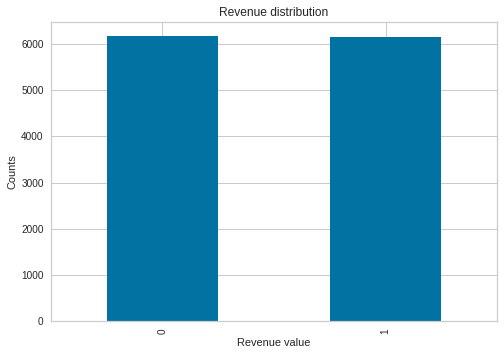

In [ ]:
plt.title("Revenue distribution")
plt.xlabel("Revenue value")
plt.ylabel("Counts")
data_converted.Revenue.value_counts().plot(kind='bar');


We see a fairly evenly distributed response variable.

In [ ]:
df_3 = data_converted[numeric]
df_3['Revenue'] = pd.Series(clusters, index=data_converted.index)
corr_matrix = df_3.corr()
corr_matrix['Revenue'].sort_values(ascending=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Revenue                    1.000000
ExitRates                  0.568072
BounceRates                0.346164
SpecialDay                 0.135175
PageValues                -0.396636
Informational_Duration    -0.448283
Informational             -0.451834
ProductRelated_Duration   -0.536452
ProductRelated            -0.563295
Administrative            -0.799269
Administrative_Duration   -0.809823
Name: Revenue, dtype: float64

We see some interesting correlations, with ExitRates and BounceRates correlating positively while Administrative and Administrative_Duration correlating highly negatively. This can be explained by visitors who spend a long time on the website getting frustrated and ultimatley not finding their product and not purchasing anything.

# 6) Clustering Output vs. Actual Labels

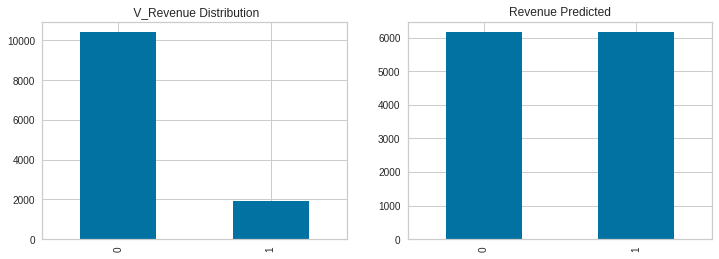

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
data_converted['V_Revenue'].value_counts().plot(kind='bar');
plt.title(' V_Revenue Distribution')
plt.subplot(1,2,2)
data_converted['Revenue'].value_counts().plot(kind='bar');
plt.title('Revenue Predicted')
plt.show();


We see a fairly poor performance by our Kmeans algorithim, which failed to correctly predict the response variable. This is corrobrated by the following poorly peroforming summary statistics.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(data_converted['V_Revenue'], data_converted['Revenue'])

0.4133008921330089

In [ ]:
from sklearn.metrics import precision_score
precision_score(data_converted['V_Revenue'], data_converted['Revenue'])


0.06797534068786502

In [ ]:
from sklearn.metrics import recall_score
recall_score(data_converted['V_Revenue'], data_converted['Revenue'])


0.21960167714884696

In [ ]:

from sklearn.metrics import f1_score
f1_score(data_converted['V_Revenue'], data_converted['Revenue'])

0.10381565906838455

# 7) SVM Modeling

In [ ]:
data_converted.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region_Three,Region_Two,TrafficType_Other,TrafficType_Three,TrafficType_Two,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue,V_Revenue
0,-0.990128,-0.996659,-0.520489,-0.491697,-0.619245,-0.532374,-0.799209,-0.029540,1.982295,0.0,...,0,0,0,0,1,0,0,1,1,1
1,-0.990128,-0.996659,-0.520489,-0.491697,-0.168286,0.397858,0.423405,0.655157,-0.529409,0.0,...,0,0,0,0,1,0,1,0,1,0
2,1.040186,0.662790,1.964686,2.069941,-1.132804,-0.912032,-0.799209,-0.581230,-0.529409,0.0,...,0,0,0,0,1,0,0,0,0,0
3,1.040186,1.053114,-0.520489,-0.491697,-0.057127,0.085413,-0.799209,-0.907817,-0.529409,0.0,...,0,1,0,1,0,0,1,0,0,0
4,0.091737,0.830316,1.823038,1.969567,0.356015,0.099835,-0.799209,-1.478985,-0.529409,0.0,...,1,0,1,0,0,0,1,0,0,0


In [ ]:
features = data_converted.iloc[:, :-2]
features.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region_One,Region_Other,Region_Three,Region_Two,TrafficType_Other,TrafficType_Three,TrafficType_Two,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,-0.990128,-0.996659,-0.520489,-0.491697,-0.619245,-0.532374,-0.799209,-0.029540,1.982295,0.0,...,1,0,0,0,0,0,1,0,0,1
1,-0.990128,-0.996659,-0.520489,-0.491697,-0.168286,0.397858,0.423405,0.655157,-0.529409,0.0,...,0,0,0,0,0,0,1,0,1,0
2,1.040186,0.662790,1.964686,2.069941,-1.132804,-0.912032,-0.799209,-0.581230,-0.529409,0.0,...,0,1,0,0,0,0,1,0,0,0
3,1.040186,1.053114,-0.520489,-0.491697,-0.057127,0.085413,-0.799209,-0.907817,-0.529409,0.0,...,0,0,0,1,0,1,0,0,1,0
4,0.091737,0.830316,1.823038,1.969567,0.356015,0.099835,-0.799209,-1.478985,-0.529409,0.0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
print(clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=features.columns)
feat_importances.nlargest(13).plot.bar()
plt.title('Feature Importance')
plt.show()
list1=feat_importances.keys().to_list()


SVMs

Before moving into the SVMs and choosing the best model, it's important to calculate the null error rate. In this model, the null error rate is just around 50% which isn't too high. This gives us a lot of room to improve on it.

In [ ]:
print('Total Observations: ', len(data_converted))
print('1 Values: ', len(data_converted[data_converted.Revenue==1]))
print('0 Values: ', len(data_converted[data_converted.Revenue==0]))
print('Null Error Rate: ', len(data_converted[data_converted.Revenue==0])/len(data_converted))

Total Observations:  12330
1 Values:  6164
0 Values:  6166
Null Error Rate:  0.500081103000811


In [ ]:
x = data_converted.drop(columns=['Revenue','V_Revenue'], axis=1)
y = data_converted[['Revenue']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=42)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

### SVM Model 1:

In the first SVM model, the features are chosen by the extra tree classifier and the parameters will be found via grid-search cross-validation. This leaves us with Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, and Pagevalues. We are left with values of 1,000 and 0.001 for C and gamma respectively.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf = clf.fit(x_train, y_train)

model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_name = features.columns[feature_idx]
feature_name

NameError: ignored

In [ ]:
x_train1 = x_train[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']]

In [ ]:
parameters = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}
gridsearch = GridSearchCV(SVC(), parameters, refit=True, verbose=3)
gridsearch.fit(x_train1, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.975 total time=   1.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.976 total time=   1.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.976 total time=   0.9s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.981 total time=   1.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.974 total time=   0.9s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.981 total time=   0.5s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.988 total time=   0.5s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.984 total time=   0.5s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.987 total time=   0.5s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.988 total time=   0.5s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.958 total time=   0.8s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [ ]:
gridsearch.best_params_

{'C': 1000, 'gamma': 0.001}

In [ ]:
clf = svm.SVC(kernel = 'linear', C=1000, gamma = 0.001)
scores = cross_val_score(clf, x_train1, y_train, cv=10)
print(scores)

[1.         0.99898683 1.         1.         0.9989858  0.9979716
 0.9989858  1.         0.9979716  0.9989858 ]


Based on the scores above, everything being 100%, it's safe to conclude that the model is being overfit. A simple cause of this may be the fact that we are including each page category and its duration.

### SVM Model 2:

Based on the above, we need to restructure the data to reduce the overfitting. We can evaluate which seem like they are multicolinear by showing a correlation matrix.

In [ ]:
x_train.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region_One,Region_Other,Region_Three,Region_Two,TrafficType_Other,TrafficType_Three,TrafficType_Two,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
Administrative,1.000000,0.954352,0.355165,0.352792,0.458547,0.425857,-0.267829,-0.453742,0.333981,-0.121539,...,-0.016575,-0.001416,0.013688,0.009859,-0.003860,-0.089220,0.149425,-0.019410,-0.102910,0.040280
Administrative_Duration,0.954352,1.000000,0.337287,0.335222,0.432817,0.416048,-0.276927,-0.464829,0.324609,-0.130153,...,-0.018824,0.003009,0.014245,0.005646,-0.005034,-0.100427,0.156262,-0.019129,-0.128486,0.042347
Informational,0.355165,0.337287,1.000000,0.949501,0.372069,0.370723,-0.092732,-0.201176,0.227781,-0.041007,...,0.027353,-0.022319,0.003944,-0.012232,-0.019078,-0.079679,0.129945,-0.024663,0.064506,0.039877
Informational_Duration,0.352792,0.335222,0.949501,1.000000,0.365875,0.366987,-0.094010,-0.210501,0.230217,-0.045140,...,0.018103,-0.017845,0.004580,-0.008594,-0.017004,-0.073702,0.122522,-0.025050,0.058360,0.043249
ProductRelated,0.458547,0.432817,0.372069,0.365875,1.000000,0.900531,-0.285858,-0.571207,0.345316,-0.020140,...,0.023355,-0.034145,0.008376,0.010350,-0.050315,-0.093575,0.138899,-0.072952,0.120846,0.030077
ProductRelated_Duration,0.425857,0.416048,0.370723,0.366987,0.900531,1.000000,-0.329573,-0.547487,0.354619,-0.048174,...,0.016783,-0.024615,0.006182,0.009508,-0.044841,-0.105640,0.143308,-0.058298,0.105121,0.028218
BounceRates,-0.267829,-0.276927,-0.092732,-0.094010,-0.285858,-0.329573,1.000000,0.724801,-0.179710,0.141242,...,-0.009459,-0.011098,0.013686,0.006563,0.034711,0.113189,-0.237768,-0.012279,0.241306,-0.041651
ExitRates,-0.453742,-0.464829,-0.201176,-0.210501,-0.571207,-0.547487,0.724801,1.000000,-0.301708,0.149596,...,-0.007442,-0.009662,0.015247,0.001416,0.024693,0.139463,-0.264879,0.020508,0.255105,-0.068644
PageValues,0.333981,0.324609,0.227781,0.230217,0.345316,0.354619,-0.179710,-0.301708,1.000000,-0.066958,...,-0.005853,-0.012818,0.015088,0.020681,0.003144,-0.090680,0.103309,-0.009091,-0.008730,0.022574
SpecialDay,-0.121539,-0.130153,-0.041007,-0.045140,-0.020140,-0.048174,0.141242,0.149596,-0.066958,1.000000,...,-0.001404,-0.011705,0.007263,0.012100,0.084286,0.062079,-0.088280,-0.025359,0.084310,-0.014495


We can see in the above matrix that each page category is strongly correlated with its corresponding duration. Because of this, we will choose to use the duration aspect of each page category since based on domain knowledge, the longer that a person spends on a given page can be better to gauge interest than just landing on the page since you have accidental clicks. We will keep the other variables that the classifier produced and recalculate the parameters.

In [ ]:
x_train2 = x_train[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']]

parameters = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}
gridsearch = GridSearchCV(SVC(), parameters, refit=True, verbose=3)
gridsearch.fit(x_train2, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.969 total time=   0.7s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.967 total time=   0.7s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.971 total time=   0.7s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.974 total time=   0.7s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.974 total time=   0.7s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.964 total time=   0.5s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.962 total time=   0.5s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.967 total time=   0.5s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.972 total time=   1.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.973 total time=   0.9s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.952 total time=   1.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [ ]:
gridsearch.best_params_

{'C': 100, 'gamma': 0.01}

Now we are left with very different paramaters, C value of 100 and 0.01 for gamma.

In [ ]:
clf = svm.SVC(kernel = 'linear', C=100, gamma = 0.01)
scores = cross_val_score(clf, x_train2, y_train, cv=10)
print(scores)

[0.96859169 0.96859169 0.97061803 0.97163121 0.98174442 0.97667343
 0.97768763 0.97363083 0.98174442 0.97261663]


These parameters and features return lower values than the first but they're still high enough to warrant suspicion of overfitting. 

# 8) Model Selection

While it would be wonderful if we could have a model predicting at nearly 100% efficiency, it's extremely unlikely that that would ever occur in the real world. For that reason, neither of these two models are good options. If I had to choose one of them based on how they both performed, I would select model number two. The scores for this model are slightly better but the worry of overfitting is still there. However, it seems that we have cut down on some of it and perhaps introducing some categorical variables as well to these numerical values will bring that down. As displayed below, applied to the testing set, the model still performs at a rate where we are extremely concerned about overfitting and multicolinearity.

In [ ]:
x_test1 = x_test[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']]

svc = SVC(C = 100, gamma = 0.01)
svc.fit(x_test1, y_test)
preds = svc.predict(x_test1)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1214
           1       0.98      0.98      0.98      1252

    accuracy                           0.98      2466
   macro avg       0.98      0.98      0.98      2466
weighted avg       0.98      0.98      0.98      2466



# 9) Clustering + SVM Output vs. Actual Label


In [ ]:
df_final = pd.DataFrame(preds, columns = ['predicted'])
df_final['actual'] = data_converted['V_Revenue']
df_final.head()

,predicted,actual
0,1,1
1,1,0
2,0,0
3,0,0
4,1,0


In [ ]:
pd.crosstab(df_final.actual, df_final.predicted)

predicted,0,1
actual,,
0,1043,1038
1,173,212


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df_final.actual.astype('int'),df_final.predicted) )

              precision    recall  f1-score   support

           0       0.86      0.50      0.63      2081
           1       0.17      0.55      0.26       385

    accuracy                           0.51      2466
   macro avg       0.51      0.53      0.45      2466
weighted avg       0.75      0.51      0.57      2466



In [ ]:
accuracy_score(df_final.actual, df_final.predicted)

0.5089213300892133

In [ ]:
precision_score(df_final.actual, df_final.predicted)

0.1696

In [ ]:
recall_score(df_final.actual, df_final.predicted)


0.5506493506493506

In [ ]:
f1_score(df_final.actual, df_final.predicted)


0.25932721712538226

Comparing our V_Revenue to the content of the Revenue column generated by our SVM algorithm, we see a pretty poor performacne with all of the comparision statistics confirming the poor efficiency of our model.

# 10) Conclusion

While in theory the KMeans cluster algorithm would be perfect in a situation like this, using the features that we selected initially and creating two clusters we do not see good results at all. Using the traditional classification scoring system, our model performs subpar to say the very least. Its accuracy is exceedingly low in every possible metric. On the other hand, moving to the SVMs, those chosen didn’t perform well either. In a sense, both of them performed perfectly, achieving 100% and near 100% success rates. But, using the variables and parameters chosen, we are extremely wary of these results seeing as in the real world there is a miniscule chance that a model is close to 100% accurate. That being said, we elected to move forward with the SVM option since it can be tweaked more. We initially only included numeric values since that is what the classifier provided us with. After our initial reducing the variables to combat multicollinearity, it still wasn’t low enough, as strange as that sounds, to be satisfied but it gives more space to move forward, allowing for the application of domain knowledge in addition to the classifier to incorporate some categorical variables and remove some as well to try and improve trust in the model.